# Pakiety

In [1]:
import pandas as pd
import numpy as np
import sklearn 
from sklearn.datasets import load_boston
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import warnings
#warnings.filterwarnings('ignore')
np.random.seed(23)

/Users/szymonszmajdzinski/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):


# Zbiór danych nt. butów męskich
## naszym celem jest przewidzenie ceny - prices_amountmin

In [2]:
# wczytujemy dane 
shoes_df = pd.read_csv('menshoes.csv')

# w tym momencie następuje odruch bezwarunkowy
shoes_df.head()

# jakie wnioski?
# @conclusions


/Users/szymonszmajdzinski/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (29) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,asins,brand,categories,colors,count,dateadded,dateupdated,descriptions,dimension,...,prices_warranty,quantities,reviews,sizes,skus,sourceurls,upc,vin,websiteids,weight
0,AVpfHrJ6ilAPnD_xVXOI,NaN,Josmo,"Clothing,Shoes,Men's Shoes,All Men's Shoes",NaN,NaN,2016-11-07T00:45:12Z,2016-11-07T00:45:12Z,"[{""dateSeen"":[""2016-11-07T00:45:12Z""],""sourceU...",NaN,...,NaN,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Josmo-8190-Plain-In...,6.993020e+11,NaN,NaN,NaN
1,AVpfHrJ6ilAPnD_xVXOI,NaN,Josmo,"Clothing,Shoes,Men's Shoes,All Men's Shoes",NaN,NaN,2016-11-07T00:45:12Z,2016-11-07T00:45:12Z,"[{""dateSeen"":[""2016-11-07T00:45:12Z""],""sourceU...",NaN,...,NaN,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Josmo-8190-Plain-In...,6.993020e+11,NaN,NaN,NaN
2,AVpfHsWP1cnluZ0-eVZ7,NaN,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,NaN,2016-06-14T04:29:57Z,2016-07-09T20:26:48Z,"[{""dateSeen"":[""2016-07-09T20:26:48Z""],""sourceU...",NaN,...,NaN,NaN,NaN,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,NaN,NaN,NaN
3,AVpfHsWP1cnluZ0-eVZ7,NaN,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,NaN,2016-06-14T04:29:57Z,2016-07-09T20:26:48Z,"[{""dateSeen"":[""2016-07-09T20:26:48Z""],""sourceU...",NaN,...,NaN,NaN,NaN,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,NaN,NaN,NaN
4,AVpfHsWP1cnluZ0-eVZ7,NaN,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,NaN,2016-06-14T04:29:57Z,2016-07-09T20:26:48Z,"[{""dateSeen"":[""2016-07-09T20:26:48Z""],""sourceU...",NaN,...,NaN,NaN,NaN,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,NaN,NaN,NaN


In [3]:
#  Korzystając z przyjaciół przyjrzyjmy się bliżej
shoes_df.info()
# @conclusions


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18280 entries, 0 to 18279
Data columns (total 48 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   18280 non-null  object 
 1   asins                2161 non-null   object 
 2   brand                18263 non-null  object 
 3   categories           18280 non-null  object 
 4   colors               10344 non-null  object 
 5   count                0 non-null      float64
 6   dateadded            18280 non-null  object 
 7   dateupdated          18280 non-null  object 
 8   descriptions         9704 non-null   object 
 9   dimension            2968 non-null   object 
 10  ean                  9690 non-null   float64
 11  features             13299 non-null  object 
 12  flavors              0 non-null      float64
 13  imageurls            17255 non-null  object 
 14  isbn                 0 non-null      float64
 15  keys                 18280 non-null 

In [4]:
threshold = shoes_df.shape[0] * 0.7
shoes_df_drop = shoes_df.loc[:, shoes_df.apply(lambda x: x.isna().sum(), axis=0) < threshold]
shoes_df_drop.head(10)

,id,brand,categories,colors,dateadded,dateupdated,descriptions,ean,features,imageurls,...,prices_dateadded,prices_dateseen,prices_issale,prices_merchant,prices_offer,prices_sourceurls,sizes,skus,sourceurls,upc
0,AVpfHrJ6ilAPnD_xVXOI,Josmo,"Clothing,Shoes,Men's Shoes,All Men's Shoes",NaN,2016-11-07T00:45:12Z,2016-11-07T00:45:12Z,"[{""dateSeen"":[""2016-11-07T00:45:12Z""],""sourceU...",6.993020e+11,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Shoe...",https://i5.walmartimages.com/asr/13ac3d61-003c...,...,2016-11-07T00:45:12Z,2016-11-05T00:00:00Z,True,NaN,REDUCED USD 12.10,https://www.walmart.com/ip/Josmo-8190-Plain-In...,NaN,NaN,https://www.walmart.com/ip/Josmo-8190-Plain-In...,6.993020e+11
1,AVpfHrJ6ilAPnD_xVXOI,Josmo,"Clothing,Shoes,Men's Shoes,All Men's Shoes",NaN,2016-11-07T00:45:12Z,2016-11-07T00:45:12Z,"[{""dateSeen"":[""2016-11-07T00:45:12Z""],""sourceU...",6.993020e+11,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Shoe...",https://i5.walmartimages.com/asr/13ac3d61-003c...,...,2016-11-07T00:45:12Z,2016-11-05T00:00:00Z,False,UnbeatableSale - Walmart.com,REDUCED USD 12.10,https://www.walmart.com/ip/Josmo-8190-Plain-In...,NaN,NaN,https://www.walmart.com/ip/Josmo-8190-Plain-In...,6.993020e+11
2,AVpfHsWP1cnluZ0-eVZ7,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,2016-06-14T04:29:57Z,2016-07-09T20:26:48Z,"[{""dateSeen"":[""2016-07-09T20:26:48Z""],""sourceU...",NaN,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Colo...",http://i5.walmartimages.com/dfw/dce07b8c-5844/...,...,2016-06-14T04:29:57Z,2016-03-08T00:00:00Z,False,SIM Supply Inc - Walmart.com,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN
3,AVpfHsWP1cnluZ0-eVZ7,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,2016-06-14T04:29:57Z,2016-07-09T20:26:48Z,"[{""dateSeen"":[""2016-07-09T20:26:48Z""],""sourceU...",NaN,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Colo...",http://i5.walmartimages.com/dfw/dce07b8c-5844/...,...,2016-06-14T04:29:57Z,2015-11-30T00:00:00Z,False,SIM Supply Inc - Walmart.com,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN
4,AVpfHsWP1cnluZ0-eVZ7,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,2016-06-14T04:29:57Z,2016-07-09T20:26:48Z,"[{""dateSeen"":[""2016-07-09T20:26:48Z""],""sourceU...",NaN,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Colo...",http://i5.walmartimages.com/dfw/dce07b8c-5844/...,...,2016-06-14T04:29:57Z,2016-04-29T00:00:00Z,False,SIM Supply Inc - Walmart.com,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN
5,AVpfHsWP1cnluZ0-eVZ7,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,2016-06-14T04:29:57Z,2016-07-09T20:26:48Z,"[{""dateSeen"":[""2016-07-09T20:26:48Z""],""sourceU...",NaN,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Colo...",http://i5.walmartimages.com/dfw/dce07b8c-5844/...,...,2016-06-14T04:29:57Z,2016-07-09T00:00:00Z,False,SIM Supply Inc - Walmart.com,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN
6,AVpfHsWP1cnluZ0-eVZ7,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,2016-06-14T04:29:57Z,2016-07-09T20:26:48Z,"[{""dateSeen"":[""2016-07-09T20:26:48Z""],""sourceU...",NaN,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Colo...",http://i5.walmartimages.com/dfw/dce07b8c-5844/...,...,2016-06-14T04:29:57Z,2016-03-10T00:00:00Z,False,SIM Supply Inc - Walmart.com,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN
7,AVpfHsWP1cnluZ0-eVZ7,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,2016-06-14T04:29:57Z,2016-07-09T20:26:48Z,"[{""dateSeen"":[""2016-07-09T20:26:48Z""],""sourceU...",NaN,"[{""key"":""Gender"",""value"":[""Men""]},{""key"

które kolumny jeszcze wydają się niepotrzebne?  
które kolumny trzeba przekształcić?

In [ ]:
# @conclusions


In [5]:
# popatrzmy na kolory butów
shoes_df_drop['colors'].value_counts()

# jakie jest ograniczenie metody .value_counts()?
# @conclusion


Black                                                                  1364
Brown                                                                   746
Blue                                                                    421
Multicolor                                                              415
White                                                                   252
                                                                       ... 
WhiteWhite-White                                                          1
Steel Blue,Blue,Red,Black,Green,Orange                                    1
Brown,Black,Gray,Red,Burgundy,Navy,Green,White,Blue,Pink,Ocean Blue       1
Flash CoralBlack,WhiteMethyl BlueDark Slate                               1
Black,True Black,Khaki,Beige                                              1
Name: colors, Length: 2080, dtype: int64

In [6]:
# wartości NA
pd.DataFrame(shoes_df_drop['colors']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18280 entries, 0 to 18279
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   colors  10344 non-null  object
dtypes: object(1)
memory usage: 142.9+ KB


jest sporo braków  
pomówimy jak z tym żyć za chwilę  
najpierw wizualizacja  
jakieś pomysły na wizualizację zmienna ciągła vs. kategoryczna?

/Users/szymonszmajdzinski/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


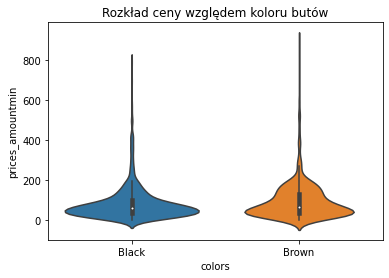

In [7]:
Black_Brown = shoes_df_drop.loc[shoes_df_drop['colors'].isin(['Black', 'Brown'])]
violin_plot = sns.violinplot(Black_Brown['colors'], Black_Brown['prices_amountmin'])
violin_plot.set_title('Rozkład ceny względem koloru butów')
plt.show()

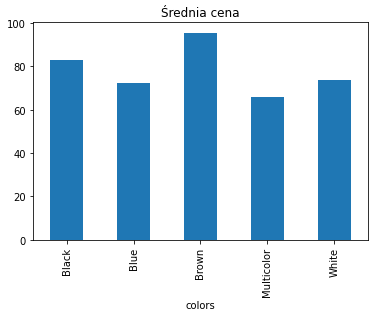

In [9]:
popular_colors=shoes_df_drop.loc[shoes_df_drop['colors'].isin(shoes_df_drop['colors'].value_counts().index[:5])]
mean_price_popular_colors=popular_colors.groupby('colors')['prices_amountmin'].mean()
mean_price_popular_colors.plot(kind='bar', title='Średnia cena')

plt.show()

# Imputacja zmiennych kategorycznych

kolumna colors miała dużo nieuzupełnionych wartości  
jak można je uzupełnić?

In [ ]:
# możnaby najczęściej występującym kolorem, ale czy to nie wprowadza fałszywej informacji?
# lepsze podejście - nowa klasa 'Other'
shoes_df_drop['colors'].fillna('Missing_color')  #działa

In [ ]:
# czy można lepiej?
# można!
shoes_df_drop['missing' + 'colors'] = shoes_df_drop['colors'].isna()*1
shoes_df_drop['colors'].fillna('Missing_color', inplace=True)

# po co ta informacja, skoro w kolumnie już jest napisane, że to brakujący kolor?
# @conclusion


### Uwaga, to co jest wyżej to wcale nie jest prawda  
### przekonamy się o tym przy one hot encoding

# Imputacja zmiennych ciągłych

In [ ]:
# w naszym zbiorze nie ma nic do imputacji ciągłej
# zerknijmy na szutczny zbiór
fake_data=pd.DataFrame({'num':np.random.choice([None, 3,4], 100), 
                        'cat': np.random.choice([None, 'Puma','Nike','Adidas'], 100, p=[0.92, 0.03, 0.03, 0.02])})
fake_data.head()

In [ ]:
# średnia czy mediana?
fake_data.num.fillna(fake_data.num.median(), inplace=True) #fake_data.num.mean()
fake_data.info()

# Outliery

In [ ]:
# dane jedynie z przedziału (średnia +- 3 sigma) - ma to sens gdy rozkład normalny
data=pd.DataFrame({'num':np.random.normal(2,0.4,1000)})
factor = 3
upper_lim = data['num'].mean () + data['num'].std () * factor
lower_lim = data['num'].mean () - data['num'].std () * factor

data = data[(data['num'] < upper_lim) & (data['num'] > lower_lim)]
data.shape

In [ ]:
# usuwanie na podstawie skrajnych percentyli
# to już zadziała "dobrze" dla każdego rozkładu
# załadujmy nasz ulubiony Boston
boston_dict = load_boston()
boston_df = pd.DataFrame(boston_dict['data'], columns=boston_dict['feature_names'])

dis_data = boston_df['DIS']
print('Wejściowy rozmiar: ', dis_data.shape[0])

upper_lim = dis_data.quantile(.95)
lower_lim = dis_data.quantile(.05)

data_percentile = dis_data[(dis_data < upper_lim) & (dis_data > lower_lim)]
print('Wyjściowy rozmiar: ', data_percentile.shape[0])
print('Pozostało %: ', round(data_percentile.shape[0]/dis_data.shape[0], 2))

# co tu jest nie halo?
# @conclusion


In [ ]:
# to może boxplot?
# faktycznie, dołu nie powinniśmy obcinać
# ale na górze są outliery!
plot_box = sns.boxplot(boston_df['DIS'])
plot_box.set_title('Rozkład zmiennej DIS')
plt.show()

In [ ]:
# nope
# ten rozkład taki jest, nie można go za to winić
# tu nie ma outlierów
plot_dens=sns.histplot(boston_df['DIS'])
plot_dens.set_title('Rozkład zmiennej DIS')
plt.show()

#  Grouping & Binning
### Agregujemy klasy do wyższego poziomu lub tniemy zmienną ciągłą na klasy

czasami potrzebujemy zrobić ze zmiennej ciągłej kategoryczną  
albo mamy zmienną kategoryczną o bardzo dużej liczbie klas  
albo dużo klas mało licznych

In [10]:
# zobaczmy jak wygląda kolumna brand 
shoes_df_drop['brand'].value_counts()
# co można z tym zrobić?
# @conclusions


Nike               1709
PUMA                574
Ralph Lauren        524
New Balance         361
VANS                356
                   ... 
FXR                   1
Reebok Work           1
Savane                1
G.H. Bass & Co.       1
Wrangler Riggs        1
Name: brand, Length: 1856, dtype: int64

In [11]:
# jest aż 560 marek, które występują raz
shoes_df_drop['brand'].value_counts()[shoes_df_drop['brand'].value_counts() == 1].shape[0]

# czyli grupujemy w kategorię Other?
# @conclusion


559

In [12]:
# przyjrzyjmy się bliżej
brands = shoes_df_drop[['brand']].groupby(['brand']).size().sort_values(ascending=False).reset_index()
brands.columns = ['brand', 'count']
brands.loc[brands['brand'].apply(lambda x:'nike' in x.lower())]

,brand,count
0,Nike,1709
42,NIKE,59
371,nike,9
472,Nike Golf,6
920,Nike Jordan Future Low,2
1627,Nike Air Jordan,1
1628,Nike Lunarglide 7,1
1629,Nike SB,1
1647,NIKE - Kobe,1
1648,NIKE AIR JORDAN,1


może warto najpierw zgrupować Najacze a potem dopiero Others?  
Nike i NIKE to na pewno to samo, ale może NIKE - Kobe to dość niszowe obuwie i warto, żeby było Others?  
to samodzielna decyzja

In [13]:
nike_synonyms = brands.loc[brands['brand'].apply(lambda x:'nike' in x.lower()), 'brand'].values

small_classes = shoes_df_drop['brand'].value_counts()[shoes_df_drop['brand'].value_counts() == 1].index

shoes_df_drop['brands' + '_processed'] = np.where(shoes_df_drop['brand'].isin(nike_synonyms), 'nike', 
                                              np.where(shoes_df_drop['brand'].isin(small_classes), 'Other', shoes_df_drop['brand']))

shoes_df_drop['brands' + '_processed'].value_counts()

/Users/szymonszmajdzinski/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


nike                           1792
PUMA                            574
Other                           552
Ralph Lauren                    524
New Balance                     361
                               ... 
Daily Charms                      2
Northwest Territory               2
Swift First-Aid                   2
Jewelry Adviser Nfl Watches       2
COBIAN                            2
Name: brands_processed, Length: 1294, dtype: int64

In [14]:
# można to zrobić też przy pomocy słownika
geo=np.random.choice(("Poland",'Chile', 'France', 'Spain'), 100)
geo=pd.Series(geo)
geo

0      Spain
1     France
2     Poland
3      Chile
4     France
       ...  
95    France
96     Spain
97    Poland
98     Chile
99    France
Length: 100, dtype: object

In [15]:
dict_geo={'Poland': "Europe", "Chile":"South America", "France":"Europe"}
from collections import defaultdict
countries_list = [('Poland','Europe'), ('France','Europe'), ('Chile','South America')]
geo.map(dict_geo)

0               NaN
1            Europe
2            Europe
3     South America
4            Europe
          ...      
95           Europe
96              NaN
97           Europe
98    South America
99           Europe
Length: 100, dtype: object

In [16]:
# metoda z użyciem dict/defaultdict
countries_dict = defaultdict(lambda:'Other')
for continent, country in countries_list:
     countries_dict[continent]=country
geo.map(countries_dict)

0             Other
1            Europe
2            Europe
3     South America
4            Europe
          ...      
95           Europe
96            Other
97           Europe
98    South America
99           Europe
Length: 100, dtype: object

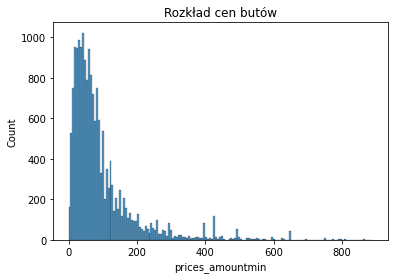

In [17]:
# naszym celem było przewidywanie cen butów
# ale może wystarczy jeśli przewidzimy to bardziej z grubsza? Tanie, średnie, drogie
prices_hist = sns.histplot(shoes_df_drop['prices_amountmin'])
prices_hist.set_title('Rozkład cen butów')
plt.show()

In [18]:
pd.cut(shoes_df_drop['prices_amountmin'], bins=[0, 100, 200, 250], labels=['cheap', 'affordable', 'expensive'])[17:]

17            cheap
18              NaN
19       affordable
20       affordable
21            cheap
            ...    
18275         cheap
18276         cheap
18277         cheap
18278         cheap
18279         cheap
Name: prices_amountmin, Length: 18263, dtype: category
Categories (3, object): ['cheap' < 'affordable' < 'expensive']

In [19]:
cutted = pd.cut(shoes_df_drop['prices_amountmin'], bins=[0, 100, 200, np.inf], labels=['cheap', 'affordable', 'expensive'])
cutted[18:]

18        expensive
19       affordable
20       affordable
21            cheap
22            cheap
            ...    
18275         cheap
18276         cheap
18277         cheap
18278         cheap
18279         cheap
Name: prices_amountmin, Length: 18262, dtype: category
Categories (3, object): ['cheap' < 'affordable' < 'expensive']

In [20]:
# zawsze warto sprawdzić
cutted[cutted.isna()]

4176     NaN
17862    NaN
18137    NaN
Name: prices_amountmin, dtype: category
Categories (3, object): ['cheap' < 'affordable' < 'expensive']

In [21]:
# i spróbować zrozumieć dlaczego
shoes_df_drop.loc[4176, 'prices_amountmin']

0.0

# Dla przypomnienia - Log Transform

In [22]:
dis_dist = sns.distplot(boston_df['DIS'])
dis_dist.set_title('Rozkład zmiennej DIS')
plt.show()

NameError: name 'boston_df' is not defined

In [23]:
dis_log_dist = sns.distplot(np.log1p(boston_df['DIS']))
dis_log_dist.set_title('Rozkład logarytmu zmiennej DIS')
plt.show()
# nie jest idealnie, ale na pewno mniej skośnie \:)

NameError: name 'boston_df' is not defined

# Categorical variables encoding
### algorytmy często nie lubią zmiennych kategorycznych

In [30]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

data = ['cold', 'cold', 'warm', 'cold', 'hot', 'hot', 'warm', 'cold', 'warm', 'hot']
values = np.array(data)

# integer encode
le = LabelEncoder()
integer_encoded = le.fit_transform(values)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
print(integer_encoded)

[[0]
 [0]
 [2]
 [0]
 [1]
 [1]
 [2]
 [0]
 [2]
 [1]]


Warto zauważyć, że to ma sens, tylko dla zmiennych, które reprezentują jakieś poziomy/kolejność

In [25]:
# uwaga! 
# nie panujemy nad kolejnością -> check OrdinalEncoder
data = ['hot', 'cold', 'warm', 'cold', 'hot', 'hot', 'warm', 'cold', 'warm', 'hot']
values = np.array(data)
le = LabelEncoder()
integer_encoded = le.fit_transform(values)
print(integer_encoded)

[1 0 2 0 1 1 2 0 2 1]


In [26]:
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

[[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


/Users/szymonszmajdzinski/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:395: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  check_array(X, dtype=np.int)
/Users/szymonszmajdzinski/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence t

In [27]:
# przykład z naszych danych
# kolumna categories wyglądała obiecująco
shoes_df_drop.head()

,id,brand,categories,colors,dateadded,dateupdated,descriptions,ean,features,imageurls,...,prices_dateseen,prices_issale,prices_merchant,prices_offer,prices_sourceurls,sizes,skus,sourceurls,upc,brands_processed
0,AVpfHrJ6ilAPnD_xVXOI,Josmo,"Clothing,Shoes,Men's Shoes,All Men's Shoes",NaN,2016-11-07T00:45:12Z,2016-11-07T00:45:12Z,"[{""dateSeen"":[""2016-11-07T00:45:12Z""],""sourceU...",6.993020e+11,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Shoe...",https://i5.walmartimages.com/asr/13ac3d61-003c...,...,2016-11-05T00:00:00Z,True,NaN,REDUCED USD 12.10,https://www.walmart.com/ip/Josmo-8190-Plain-In...,NaN,NaN,https://www.walmart.com/ip/Josmo-8190-Plain-In...,6.993020e+11,Josmo
1,AVpfHrJ6ilAPnD_xVXOI,Josmo,"Clothing,Shoes,Men's Shoes,All Men's Shoes",NaN,2016-11-07T00:45:12Z,2016-11-07T00:45:12Z,"[{""dateSeen"":[""2016-11-07T00:45:12Z""],""sourceU...",6.993020e+11,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Shoe...",https://i5.walmartimages.com/asr/13ac3d61-003c...,...,2016-11-05T00:00:00Z,False,UnbeatableSale - Walmart.com,REDUCED USD 12.10,https://www.walmart.com/ip/Josmo-8190-Plain-In...,NaN,NaN,https://www.walmart.com/ip/Josmo-8190-Plain-In...,6.993020e+11,Josmo
2,AVpfHsWP1cnluZ0-eVZ7,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,2016-06-14T04:29:57Z,2016-07-09T20:26:48Z,"[{""dateSeen"":[""2016-07-09T20:26:48Z""],""sourceU...",NaN,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Colo...",http://i5.walmartimages.com/dfw/dce07b8c-5844/...,...,2016-03-08T00:00:00Z,False,SIM Supply Inc - Walmart.com,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,SERVUS BY HONEYWELL
3,AVpfHsWP1cnluZ0-eVZ7,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,2016-06-14T04:29:57Z,2016-07-09T20:26:48Z,"[{""dateSeen"":[""2016-07-09T20:26:48Z""],""sourceU...",NaN,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Colo...",http://i5.walmartimages.com/dfw/dce07b8c-5844/...,...,2015-11-30T00:00:00Z,False,SIM Supply Inc - Walmart.com,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,SERVUS BY HONEYWELL
4,AVpfHsWP1cnluZ0-eVZ7,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,2016-06-14T04:29:57Z,2016-07-09T20:26:48Z,"[{""dateSeen"":[""2016-07-09T20:26:48Z""],""sourceU...",NaN,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Colo...",http://i5.walmartimages.com/dfw/dce07b8c-5844/...,...,2016-04-29T00:00:00Z,False,SIM Supply Inc - Walmart.com,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,SERVUS BY HONEYWELL


In [28]:
shoes_df_drop['categories'].value_counts()

All Men's Shoes,Shoes,Men's Shoes,Clothing                                                                                 3698
Clothing,Shoes,Men's Shoes,All Men's Shoes                                                                                 1632
Men's Casual Shoes,Shoes,Men's Shoes,Clothing                                                                               698
All Men's Clothing,Men's Clothing,Men's Outerwear,Clothing, Shoes & Jewelry,Clothing                                        586
Clothing, Shoes & Accessories,Men's Shoes,Athletic                                                                          391
                                                                                                                           ... 
Clothing, Shoes & Accessories,Men's Clothing,Jeans,See more Levis Jeans 560 Comfort Loose Fit Tapered Leg ...                 1
Automotive,Motorcycle & ATV,Men's Casual Shoes,Shoes,Men's Shoes,Protective Gear,Clothing               

In [29]:
# podrążmy temat
categories = {}
def split_and_count(x, categories):
    cat_list = x.split(',')
    for cat in cat_list:
        categories.setdefault(cat, 0)
        categories[cat] += 1
    return categories

for row in shoes_df_drop['categories'].iteritems():
    split_and_count(row[1], categories)
categories_df = pd.DataFrame.from_dict(categories, orient='index').reset_index()
categories_df.columns = ['category', 'count']
categories_df.sort_values(by='count', ascending=False).head(20)

# kategorie typu athletic, *sport, *outwear mogą się nadawać na one-hot

,category,count
0,Clothing,20258
1,Shoes,9768
2,Men's Shoes,9581
3,All Men's Shoes,6179
23,Shoes & Jewelry,5389
9,Men,3394
7,Shoes & Accessories,3297
15,Men's Clothing,3186
21,All Men's Clothing,1583
4,Men's Casual Shoes,1429


# Scaling
- min-max scaling
- standarization

niektóre algorytmy nie lubią dużych skal zmiennych - regresja liniowa z poprzednich zajęć   
jakiś parametr musi "obsłużyć" bardzo małe i bardzo duże liczby  
inne potrzebują mieć zmienne w konkretnym przedziale

In [ ]:
# min-max scaling
from sklearn.preprocessing import MinMaxScaler
data = np.array([-1, 2, -0.5, 6, 0, 10, 1, 18]).reshape(-1, 1)
mm_scaler = MinMaxScaler()

print(mm_scaler.fit_transform(data))


In [ ]:
# standarization
from sklearn.preprocessing import StandardScaler
data = np.array([-1, 2, -0.5, 6, 0, 10, 1, 18]).reshape(-1, 1)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
print(scaled_data)
print(np.round(np.mean(scaled_data), 4), np.std(scaled_data))

# Extracting info from date

In [ ]:
from datetime import date

data = pd.DataFrame({'date':
['01-01-2017',
'04-12-2008',
'23-06-1988',
'25-08-1999',
'20-02-1993',
]})

#Transform string to date
data['date'] = pd.to_datetime(data.date, format="%d-%m-%Y")

#Extracting Year
data['year'] = data['date'].dt.year

#Extracting Month
data['month'] = data['date'].dt.month

#Extracting passed years since the date
data['passed_years'] = date.today().year - data['date'].dt.year

#Extracting passed months since the date
data['passed_months'] = (date.today().year - data['date'].dt.year) * 12 + date.today().month - data['date'].dt.month

#Extracting the weekday name of the date
data['day_name'] = data['date'].dt.day_name()

In [ ]:
data

# warto poczytać
pakiet category_encoders:
- https://kiwidamien.github.io/encoding-categorical-variables.html
- https://pbpython.com/categorical-encoding.html

Ciekawa strona z przykładami wizualizacji (wraz z kodem):
    https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/